In [13]:
# Run this cell to configure Tensorflow to use your GPU
import tensorflow as tf
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    print(gpu)
    tf.config.experimental.set_memory_growth(gpu, True)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [14]:
import keras_cv
model = keras_cv.models.ImageClassifier.from_preset("efficientnetv2_b2_imagenet_classifier")

100%|██████████| 2.80k/2.80k [00:00<00:00, 5.12MB/s]


100%|██████████| 39.5M/39.5M [00:01<00:00, 29.4MB/s]


In [16]:
# Uncomments to look at the model's weights. It's a list of very large tensors!
# model.weights

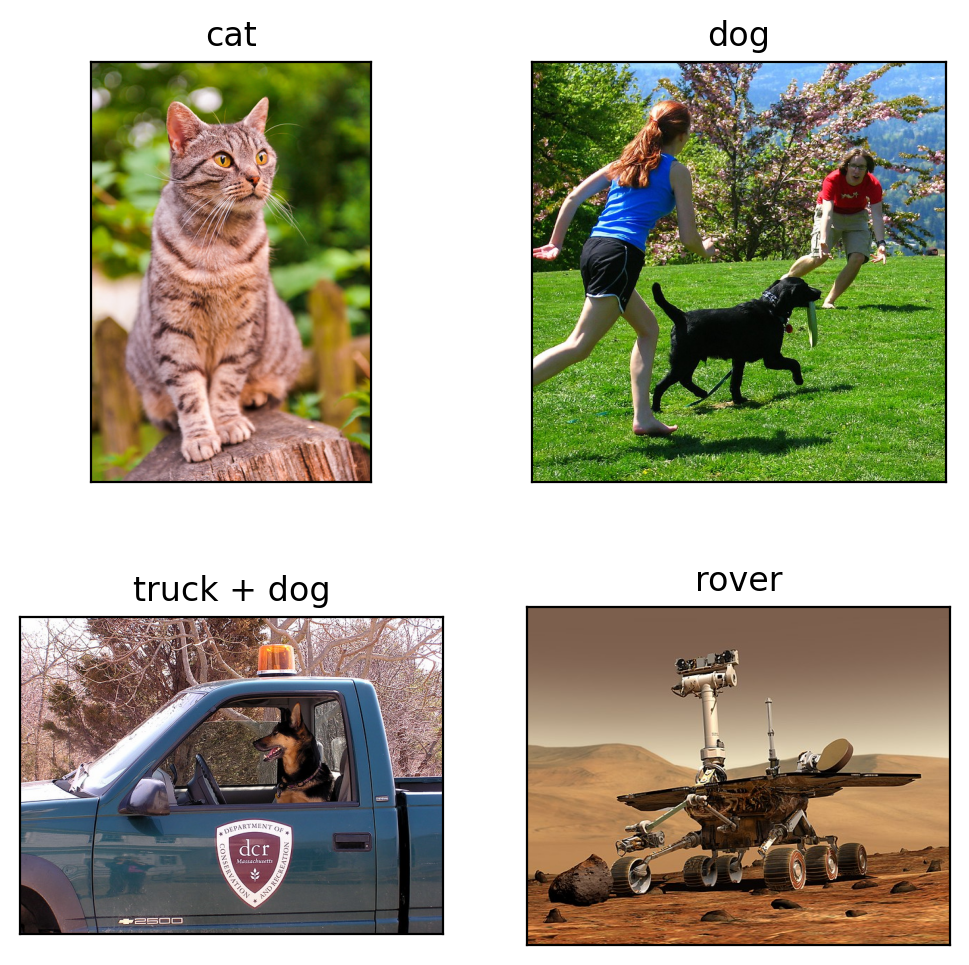

In [17]:
from collegium.m02_cnn.utils.plot import *

# Loads a tiny batch of images from Internet
images_raw = load_tiny_batch()
plot_images_grid(images_raw)

In [18]:
import numpy as np

# Cropped and/or resized into ImageNet shape 224x224x3 array of type uint8 [0, 255]
images_resized = np.array([crop_and_resize_for_imagenet(i) for i in images_raw.values()])

In [19]:
import pandas as pd

# Returns shape (?, 1000) array of floats
model_outputs = model.predict(images_resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


In [20]:
from collegium.m02_cnn.utils.imagenet_class1k import class_mapping
topk = tf.math.top_k(model_outputs, k=5)
report_by_name = {
    name: pd.DataFrame(
        {
            'class_label': class_mapping.loc[topk.indices.numpy()[i]][0], 
            'probability': topk.values.numpy()[i].round(2)
        }, 
    )
    for i, name in enumerate(images_raw.keys())
}

class_label  probability
285      Egyptian cat         0.34
282         tiger cat         0.27
281  tabby, tabby cat         0.25
287   lynx, catamount         0.01
283       Persian cat         0.00

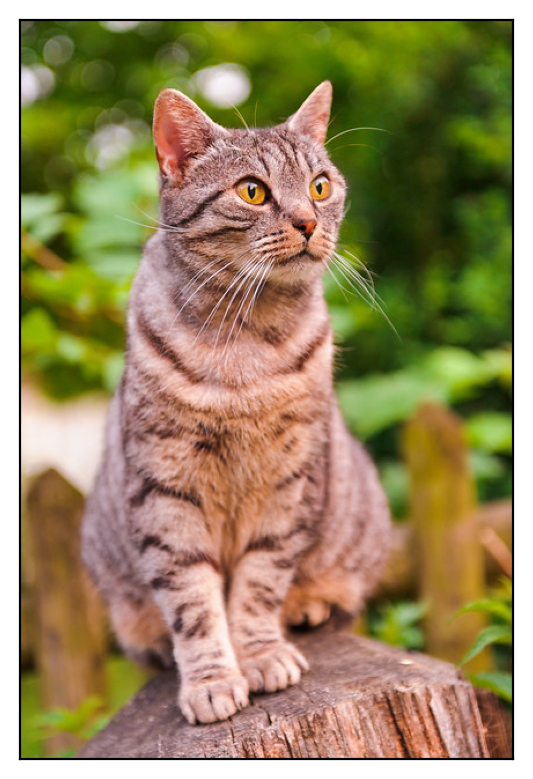

In [21]:
# Displays the model's predicted classes.

plot_image(images_raw['cat'])
report_by_name['cat']

class_label  probability
208      Labrador retriever         0.26
197         giant schnauzer         0.21
205   flat-coated retriever         0.14
206  curly-coated retriever         0.03
234              Rottweiler         0.03

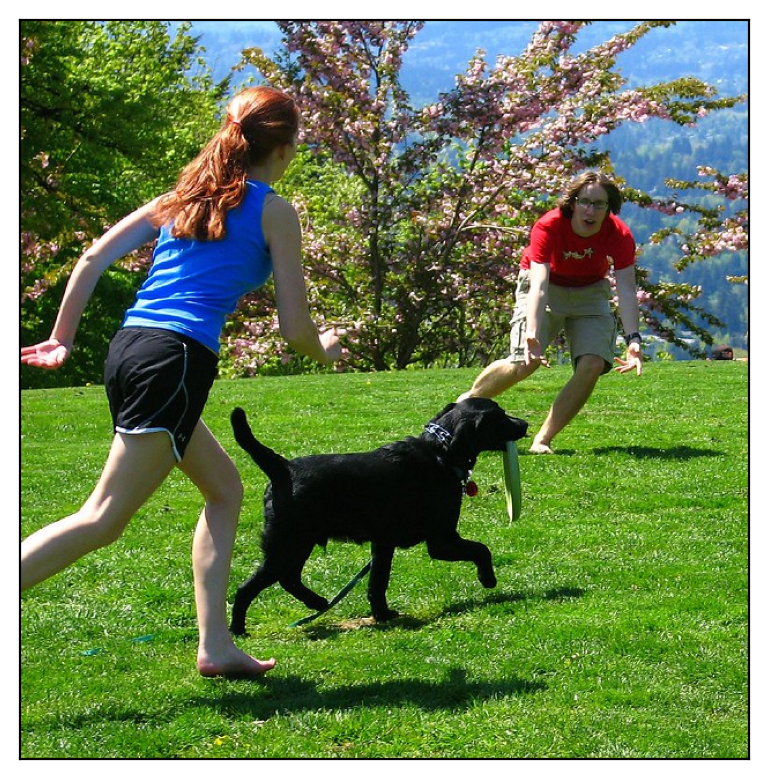

In [22]:
# People were not one of the classes in ImageNet 1K

plot_image(images_raw['dog'])
report_by_name['dog']

class_label  probability
225                                           malinois         0.19
235  German shepherd, German shepherd dog, German p...         0.19
656                                            minivan         0.12
237                                 miniature pinscher         0.06
468                           cab, hack, taxi, taxicab         0.06

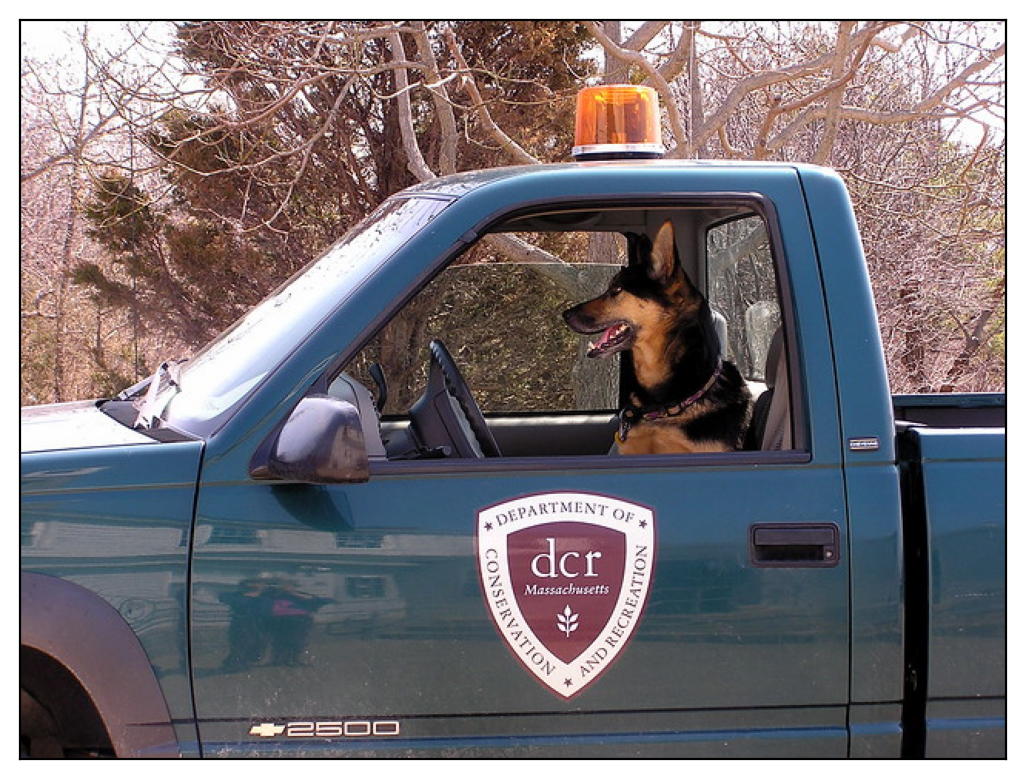

In [23]:
# The model was not able to find the dog, only the truck.

plot_image(images_raw['truck + dog'])
report_by_name['truck + dog']

class_label  probability
908                                   wing         0.20
895               warplane, military plane         0.10
595                      harvester, reaper         0.07
856  thresher, thrasher, threshing machine         0.06
744                    projectile, missile         0.03

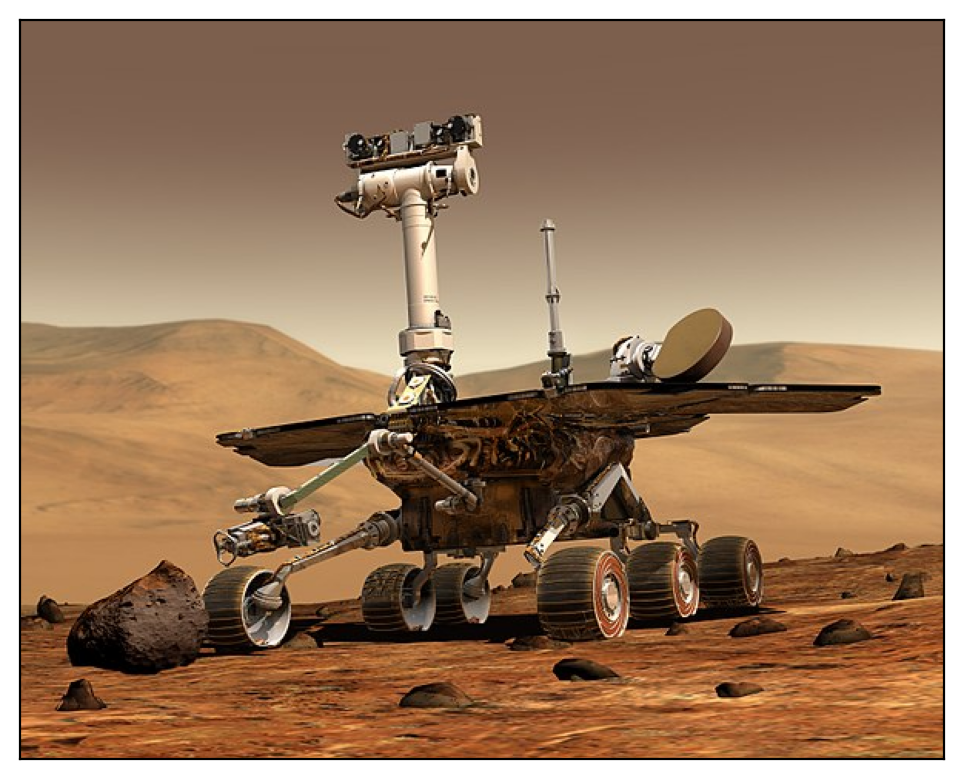

In [24]:
# Rovers are definitely not one of the 1K classes in ImageNet.
# It is insightful to see what the models thinks the rover looks like, though.

plot_image(images_raw['rover'])
report_by_name['rover']